In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("lab04.ipynb")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

# Lab 4: Intro to Visualization

### Learning Objectives

In this notebook, you will learn about:

- How to explore datasets
- How to prepare data to be visualizaed
- The purpose of different visualizations 
- How to create and code visualizations
- How to analyze and draw insights from visualizations

#### Helpful Data Science Resources 
Here are some resources you can check out while doing this notebook and to explore data visualization further!
- [DATA 8 Textbook](https://inferentialthinking.com/chapters/07/Visualization.html) - Visualization chapter
- [Cool Data Visualizations](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)

**A note on the autograder for this lab:** The test cases in the autograder are not comprehensive -- you can create some completely incorrect graph while passing the autograder. So assure yourself that you are making the correct visualizations, we have provided the correct outputs with each question. Your score for this lab will still solely depend on the autograder provided. 

---
## Part 1: Explorative Data Analysis (EDA)

### Unemployment rate and NaN values 

Let's start off with loading in the dataset. We will be using unemployment rate data from Fred. 

**Question 1.1:** Load in the dataset `data/unemployment_rate.csv` and read it into a Pandas dataframe. Name it `unemployment_df`.

In [3]:
unemployment_df = pd.read_csv("data/unemployment_rate.csv")
unemployment_df.head()

,DATE,LNS14000001,LNS14000002,UNRATE
0,1954/4/1,5.6,6.4,5.9
1,1954/5/1,5.7,6.3,5.9
2,1954/6/1,5.3,6.2,5.6
3,1954/7/1,5.6,6.3,5.8
4,1954/8/1,6.0,6.2,6.0


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2:** The dataset contains three columns: the overall unemployment rate, unemployment rate for males, and unemployment rate for females. Referencing [Fred's website](https://fred.stlouisfed.org/graph/?g=jXvf), change the column names accordingly and in the following order: `Date`, `Male Unemployment`, `Female Unemployment`, and `Overall Unemployment`. 

In [5]:
unemployment_df= unemployment_df.rename(columns= {'DATE': 'Date', 'LNS14000001': 'Male Unemployment', 'LNS14000002':'Female Unemployment', 
                                                  'UNRATE': 'Overall Unemployment'})
unemployment_df.head()

,Date,Male Unemployment,Female Unemployment,Overall Unemployment
0,1954/4/1,5.6,6.4,5.9
1,1954/5/1,5.7,6.3,5.9
2,1954/6/1,5.3,6.2,5.6
3,1954/7/1,5.6,6.3,5.8
4,1954/8/1,6.0,6.2,6.0


In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

Before plotting the data, it is important to determine if there are any nan values in the dataset. 


<!-- BEGIN QUESTION -->

**Question 1.3:**  Does the dataset contain any NaN values? Explain what you did to reach your conclusion.

*Hint*: `df.isnull()` could be useful; [here](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) for reference. 

Yes the dataset does have NaN values. I checked with unemployment_df[unemployment_df.isnull()== True]

In [7]:
# OPTIONAL FOR TESTING

unemployment_df[unemployment_df.isnull()== True]

,Date,Male Unemployment,Female Unemployment,Overall Unemployment
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
821,NaN,NaN,NaN,NaN
822,NaN,NaN,NaN,NaN
823,NaN,NaN,NaN,NaN
824,NaN,NaN,NaN,NaN


In [8]:
unemployment_df['Date']

0       1954/4/1
1       1954/5/1
2       1954/6/1
3       1954/7/1
4       1954/8/1
         ...    
821     2022/9/1
822    2022/10/1
823    2022/11/1
824    2022/12/1
825     2023/1/1
Name: Date, Length: 826, dtype: object

<!-- END QUESTION -->

---
## Part 2: Data Visualization

### Line Plots

A line plot is used to display data as a series of points connected by a line. It's generally used to visualize how a variable changes over time (also known as [time series data](https://www.investopedia.com/terms/t/timeseries.asp)), often with a time-related variable on the x-axis (minutes, days, months, years, etc.) and a numerical variable on the y-axis.

Let's create a line plot to see how the overall unemployment rate changes over the years.


**Question 2.1:** Use *matplotlib* to make a line plot for the overall unemployment rate over the entire sample period. Specifically here we want to use [datetime](https://docs.python.org/3/library/datetime.html). Label your plot properly (both axes and title).  There is no need to include a legend in your plot. It's ok if your plot looks slightly different (e.g. different colors, different line width, etc) as long as it is still readable and contains all the pertinent information. We have included an image of what your line plot should look like.

*Hint:* you might need to convert the date column into a pandas [datetime data type](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) object first.

<img src="assets/q2_1.png" width="700">

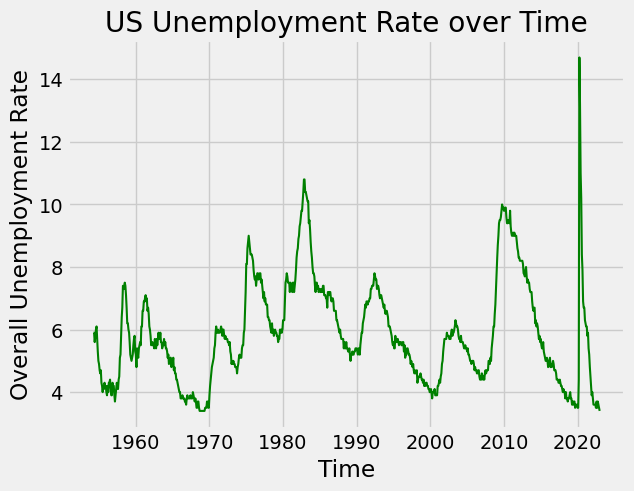

In [9]:
def q2_1():
    unemployment_df['Date']= pd.to_datetime(unemployment_df['Date'])
    x=unemployment_df.set_index('Date')[['Overall Unemployment']]
    plt.plot(x.index, x.values,'g-', linewidth=1.5)
    plt.ylabel("Overall Unemployment Rate")
    plt.xlabel("Time")
    plt.title("US Unemployment Rate over Time")
    return plt.gca() # DO NOT edit this line, it's necessary for the autograder
q2_1(); # Once you have created the plot, try removing the semi-colon at the end. What happens?

In [10]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2:** What kind of trend in unemployment rate can you find from the graph above? Please provide potential reasonings of the trend you find from the graph above. 

The rise of unemployment rates occurs around economic recessions such as the 1980s, 2008 financial crisis and 2020 covid pandemic. The recessions lead to job losses because of lower demand of labor as demand for goods and services decrease, making the business cut costs. The sharp drop of unemployment occuring in 2020 suggest a recovery after the pandemic.



<!-- END QUESTION -->

**Question 2.3:** Create similar line plots as in question 2.1, but illustrate the unemployment rate separately for each sex. Label your plot properly (both axes and title) and include an appropriate legend. We have included an image of what the plot should look like.

*Hint*: To graph multiple line graphs on the axis, you can simply stack multiple `plt.plot(...)` with the same x argument. 

*Hint*: Graph males before females for specific test cases. 

<img src="assets/q2_3.png" width="800">

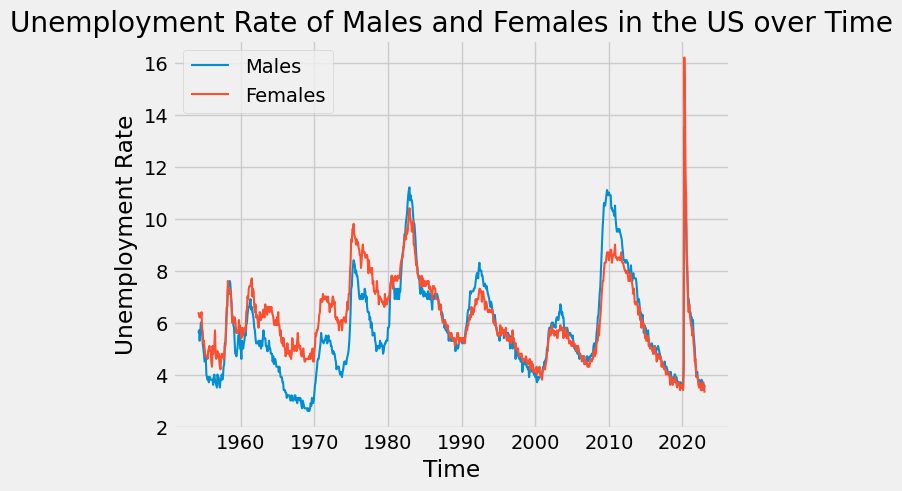

In [17]:
def q2_3():
    unemployment_df['Date']= pd.to_datetime(unemployment_df['Date'])
    x=unemployment_df.set_index('Date')[['Female Unemployment']]
    y=unemployment_df.set_index('Date')[['Male Unemployment']]
 
    plt.plot(y.index, y.values, linewidth=1.5)
    plt.plot(x.index, x.values, linewidth=1.5)    
    plt.ylabel('Unemployment Rate')
    plt.xlabel('Time')
    plt.title('Unemployment Rate of Males and Females in the US over Time')
    plt.legend(['Males','Females'])
    return plt.gca() # DO NOT edit this line

q2_3();

In [18]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.4:** What kind of differences between the sexes do you see in the plot above? Why may they have occured?

From 1965 to 1970, males had lower but more fluctuating unemployment rates, suggesting they were more affected by recessions. By the 2000s, male and female unemployment rates became more similar.

During covid in 2020, male unemployment rose higher, likely because women held more essential jobs like nursing. Over time, the decline in female unemployment may reflect reduced gender bias. 









<!-- END QUESTION -->

#### Inflation and Unemployment Rate

Now, we'll be plotting both inflation and unemployment data. What's the famous curve that attempts to connect these quantities?

**Question 2.5**: Load in the dataset `data/inflation_rate.csv` and read it into a pandas dataframe named `inflation_df`. Then, rename the columns to `Date` and `Inflation`. 

In [19]:
inflation_df = pd.read_csv('data/inflation_rate.csv').rename(columns={'DATE': 'Date', 'CPIAUCSL_PC1': 'Inflation'})
                                                        
inflation_df.head()

,Date,Inflation
0,1948/1/1,7.67221
1,1949/1/1,-0.98080
2,1950/1/1,1.06402
3,1951/1/1,7.94113
4,1952/1/1,2.28439


In [20]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Merging datasets

It's far easier to plot with a single dataframe; several plotting libraries require you to pass in the dataframe you're intending to plot. 

**Question 2.6**: Merge `unemployment_df` and `inflation_df`, only keep rows that are present in both data frames.


In [17]:
inflation_df['Date']= pd.to_datetime(inflation_df['Date'])
merged_df = unemployment_df.merge(inflation_df, on='Date', how='inner')
merged_df.head()

,Date,Male Unemployment,Female Unemployment,Overall Unemployment,Inflation
0,1955-01-01,4.8,5.3,4.9,-0.25746
1,1956-01-01,3.8,4.5,4.0,1.47411
2,1957-01-01,3.9,4.8,4.2,3.39269
3,1958-01-01,5.7,5.9,5.8,2.73002
4,1959-01-01,5.9,6.2,6.0,0.93199


In [18]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7**: Using the merged dataframe, plot line graphs for both inflation and unemployment over time. Label your plot properly (both axes and title), and use a legend. We have included an image of what the plot should look like.

*Hint:* The code for this question should look fairly similar to the code for question 2.3.

*Hint:* Graph inflation before unemployment for specific test cases. 

<img src="assets/q2_7.png" width="700">

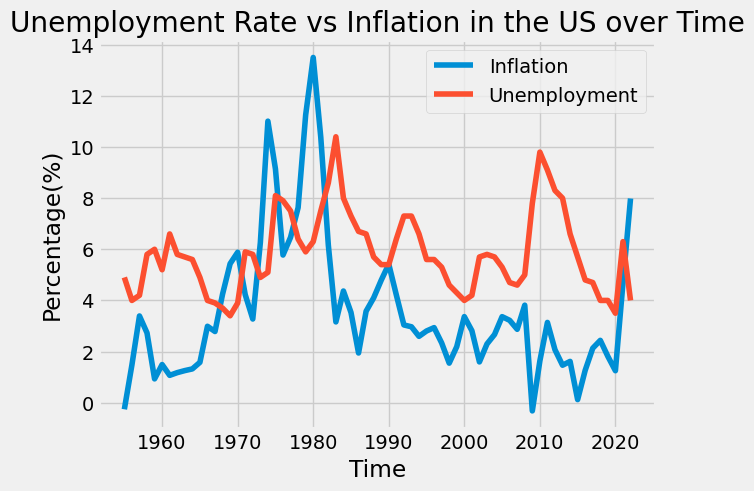

In [19]:
def q2_7():
    x=merged_df.set_index('Date')[['Overall Unemployment']]
    y=merged_df.set_index('Date')[['Inflation']]
    plt.plot(y.index, y.values)
    plt.plot(x.index, x.values)    
    plt.ylabel('Percentage(%)')
    plt.xlabel('Time')
    plt.title('Unemployment Rate vs Inflation in the US over Time')
    plt.legend(['Inflation', 'Unemployment'])
    return plt.gca() # DO NOT edit this line
q2_7();

In [20]:
grader.check("q2_7")

q2_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.8**: We briefly spoke about the Phillip's Curve in lab 2; read more [here](https://data88e.org/textbook/content/09-macro/phillips_curve.html). Does the graph above roughly match what you would expect from the curve? Why or why not?

Yes, the graph  matches the Phillips Curve, which suggests an inverse relationship between inflation and unemployment. We can see in 1970s and 1980s, 2008 financial crisis and 2020 covid pandemic, where a decrease in inflation led to a rise in unemployment.


<!-- END QUESTION -->

**Question 2.9**: For the rest of our analysis, it will be helpful to have a `Decade` column that represents which decade a measurement was taken in. Add this column to `merged_df`; each decade should be represented by the first year in that decade (so all years from 1950-1959 fall under the decade of 1950).

*Hint:* This may be tricky, `//` is floor division; look [here](https://www.geeksforgeeks.org/floor-division-in-python/) for more reference. 

In [21]:
merged_df['Decade'] = (merged_df['Date'].dt.year //10) *10
merged_df.head()

,Date,Male Unemployment,Female Unemployment,Overall Unemployment,Inflation,Decade
0,1955-01-01,4.8,5.3,4.9,-0.25746,1950
1,1956-01-01,3.8,4.5,4.0,1.47411,1950
2,1957-01-01,3.9,4.8,4.2,3.39269,1950
3,1958-01-01,5.7,5.9,5.8,2.73002,1950
4,1959-01-01,5.9,6.2,6.0,0.93199,1950


In [22]:
grader.check("q2_9")

q2_9 results: All test cases passed!

### Bar Charts

A bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category, and the length of each bar is proportional to the frequency of the corresponding category. While not necessary, most bar charts have equally spaced and equally wide columns.

**Question 2.10**: `Decade` is a categorical variable in our analysis. Make a bar chart representing the number of years from each decade in our analysis. We have included an image of what the plot should look like.

*Hint:* You will first need to get the number of years from each decade in `merged_df`, consider making a series and storing it in `counts`.

*Hint:* Don't use `.value_counts()` as it will fail specific test cases; think of other ways to find the sizes. 

<img src="assets/q2_10.png" width="700">

In [23]:
merged_df.groupby('Decade').count()['Date']

Decade
1950     5
1960    10
1970    10
1980    10
1990    10
2000    10
2010    10
2020     3
Name: Date, dtype: int64

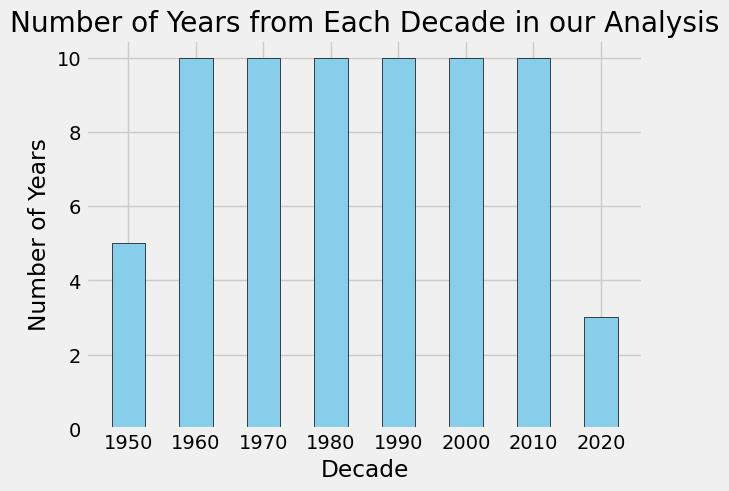

In [24]:
def q2_10():
    counts = merged_df.groupby('Decade').count()['Date']
    plt.bar(counts.index,counts.values, color='skyblue', edgecolor='black', width=5) # Make your plot; consider using the parameters `color='skyblue', edgecolor='black', width=5`
    plt.ylabel('Number of Years')
    plt.xlabel('Decade')
    plt.title('Number of Years from Each Decade in our Analysis') # Label your plot
    return plt.gca() # DO NOT edit this line
q2_10();


In [25]:
grader.check("q2_10")

q2_10 results: All test cases passed!

### Histograms

A histogram allows you to visualize the distribution of a numerical variable, helping you understand how spread out the values in your data are. It looks quite similar to a bar chart, with a few important differences.

Histograms follow the *area principle* and have two defining properties:

1. As the values on the horizontal axis are numerical and therefore have fixed positions on the number line, the bins are drawn to scale and are contiguous (though some might be empty).
1. The area of each bar is proportional to the number of entries (or percent of data values) in the corresponding bin. The histogram is said to be drawn on a *density scale*.


**Question 2.11**: Plot histogram for overall unemployment, using all the data available in `merged_df`. The `bins` of the histogram should range from 3 to 11 (inclusive) with stepsizes of 0.5. Label your plot appropriately (including axes and titles). We have included an image of what the plot should look like.

*Hint:* Python's `np.arange` function is exclusive for the endpoint. 

<img src="assets/q2_11.png" width="700">

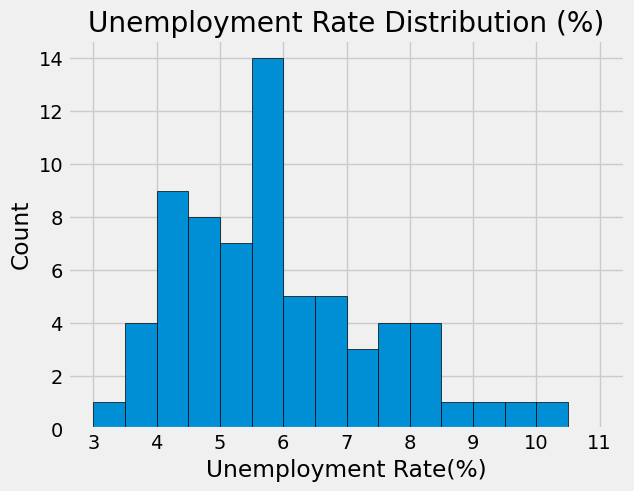

In [26]:
def q2_11():
    bins = np.arange(3, 11.5, 0.5)
    merged_df['Overall Unemployment'].hist(bins=bins,edgecolor = "black") 
    plt.ylabel('Count')
    plt.xlabel('Unemployment Rate(%)')
    plt.title('Unemployment Rate Distribution (%)')
    return plt.gca() # DO NOT edit this line
q2_11();

In [27]:
grader.check("q2_11")

q2_11 results: All test cases passed!

### Scatter Plots

Scatter plots are used to visualize the relationship between two numerical variables. They help us infer the association between two variables. The association between two variables refers to how one variable changes with respect to the other.  We can describe the association between two variables based on two factors:

1. *Magnitude:* Is the association strong or weak? If the points on the scatter plot all line up along a straight line (in any direction), it means that the association between the variables is strong. On the other hand, if the points are all spread out and scattered (no pun intended), it means that the association is weak.

2. *Direction (or sign):* Is the association positive or negative? If one variable increases as the other variable increases, the association between the two variables is positive. If one decreases as the other increases, the association is negative.

In lab 2, we had already created a scatter plot of US unemployment vs inflation. That scatter plot is replicated below for your convenience.


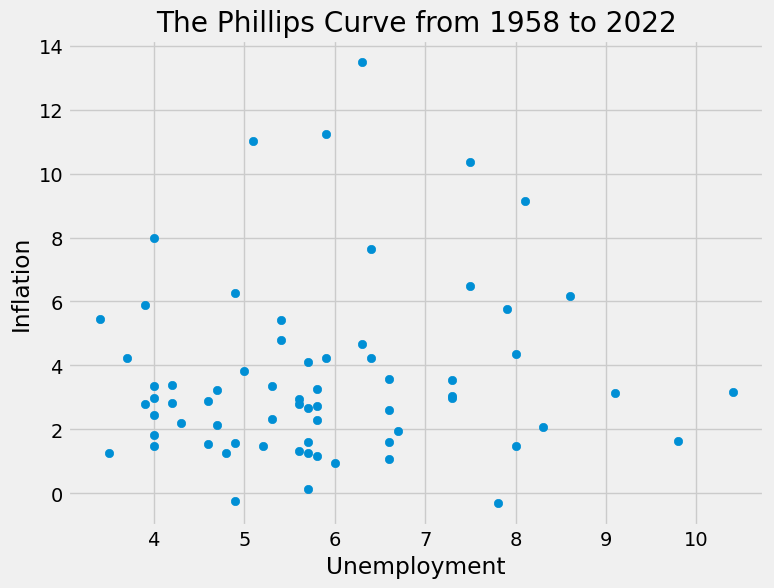

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(merged_df['Overall Unemployment'], merged_df['Inflation']);
plt.xlabel("Unemployment")
plt.ylabel("Inflation")
plt.title("The Phillips Curve from 1958 to 2022");

If you look [here](https://data88e.org/textbook/content/09-macro/phillips_curve.html?highlight=phillip), you can see that economists were looking at the Phillip's curve by decade. They do this because we may have too broad of a timeframe to accurately see the pattern of the curve. Let's help remedy this issue by considering the relationship separately for each decade.

**Question 2.12**: Use the [seaborn](https://seaborn.pydata.org/index.html) package to create a scatter plot using the same data as above, but with colored scatter points based on the `Decade` column. Keep unemployment on the x-axis and inflation on the y-axis. Include a legend and label your plot properly. We have included an image of what the plot should look like.

*Hint:* Read the [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

<img src="assets/q2_12.png" width="700">

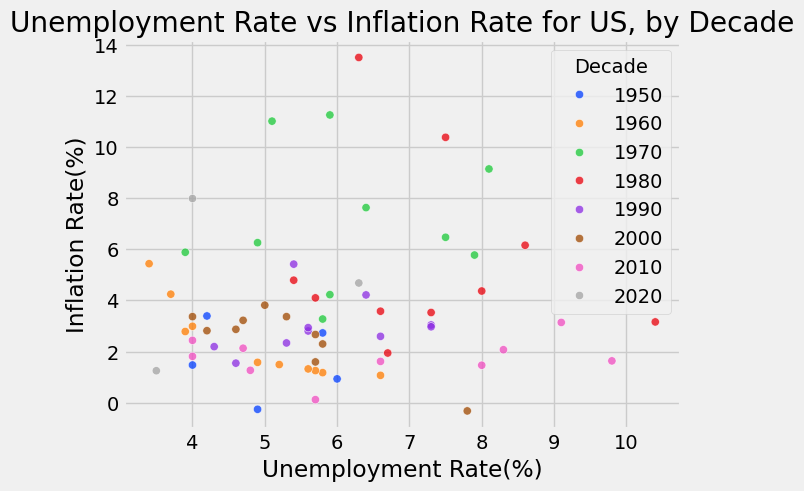

In [37]:
def q2_12():
    sns.scatterplot(data=merged_df, x='Overall Unemployment', y='Inflation', hue="Decade", palette="bright", alpha=0.75 )
    plt.xlabel("Unemployment Rate(%)")
    plt.ylabel("Inflation Rate(%)")
    plt.title("Unemployment Rate vs Inflation Rate for US, by Decade")
    plt.legend(title= "Decade")

    return plt.gca()  # DO NOT edit this line
q2_12();

In [31]:
grader.check("q2_12")

q2_12 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.13**: We defined an `alpha` parameter for you in the function call above. What is that parameter, what does it do and which problem does it help avoid?

*Hint:* Try removing/changing the alpha value and see how that changes the plot.

The alpha parameter is 0.75 and it controls the transparency of the plotted points to distinguish overlapping points better.

<!-- END QUESTION -->

Seaborn's `sns.lmplot` is great for drawing linear patterns on scatter plots. Not only can it draw one linear pattern, but it can plot and color multiple lines for different values of a categorical variable.

**Question 2.14**: Firstly, as we don't have complete data from the decades `1950` and `2020`, please drop all rows from those decades and store the resulting dataframe in `relevant_decades`. Then, create your `lmplot`. Keep unemployment on the x-axis and inflation on the y-axis. Include a legend and label your plot properly. We have included an image of what the plot should look like.

*Hint:* Read the [documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html), the parameters you pass in are extremely similar to what you did for question 2.12.

<img src="assets/q2_14.png" width="700">

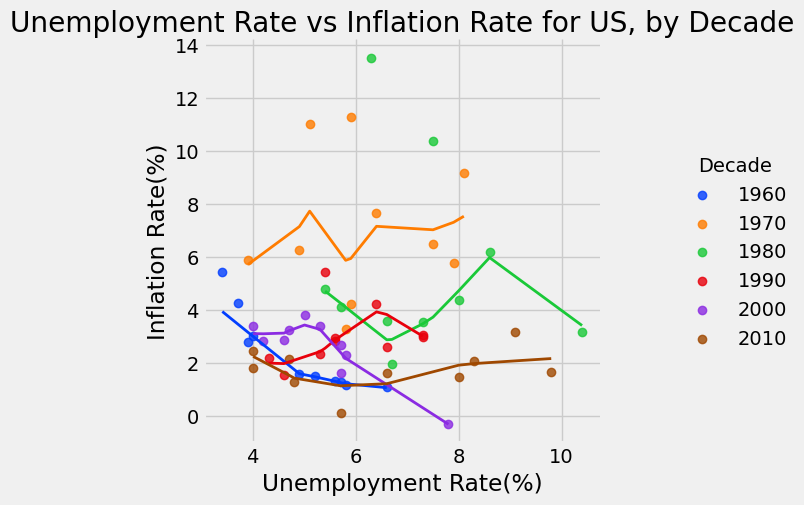

In [38]:
def q2_14():
    relevant_decades = merged_df [(merged_df['Decade']!=1950) & (merged_df['Decade']!= 2020)]
    ag_test = sns.lmplot(data=relevant_decades, x='Overall Unemployment', y='Inflation', hue="Decade",# DO NOT edit ag_test = sns.lmplot
            ci = None, lowess = True, line_kws={'lw': 2}, palette="bright") 
    plt.xlabel("Unemployment Rate(%)")
    plt.ylabel("Inflation Rate(%)")
    plt.title("Unemployment Rate vs Inflation Rate for US, by Decade")
    return relevant_decades, ag_test.axes.flatten(), plt.gca() # DO NOT edit this line
q2_14();

In [39]:
grader.check("q2_14")

q2_14 results: All test cases passed!

---
## Part 3. More Plots with Seaborn

### Boxplot

A boxplot is similar to a histogram as it also visualizes the distribution of a numerical variable, but it gives you more specific statistics about the distribution: the minimum, lower quartile (value at the bottom 25th percentile), median (value at the 50th percentile), upper quartile (value at the top 25th percentile) and maximum. 


**Question 3.1**: Use [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and `unemployment_df` to create a box plot of three different unemployment rates: `Male Unemployment`, `Female Unemployment`, and `Overall Unemployment rate`. Label your plot properly (although there should be no need to manually label your x-axis). We have included an image of what the plot should look like.

<img src="assets/q3_1.png" width="700">

In [40]:
unemployment_df

,Date,Male Unemployment,Female Unemployment,Overall Unemployment
0,1954-04-01,5.6,6.4,5.9
1,1954-05-01,5.7,6.3,5.9
2,1954-06-01,5.3,6.2,5.6
3,1954-07-01,5.6,6.3,5.8
4,1954-08-01,6.0,6.2,6.0
...,...,...,...,...
821,2022-09-01,3.6,3.4,3.5
822,2022-10-01,3.7,3.7,3.7
823,2022-11-01,3.7,3.6,3.6
824,2022-12-01,3.4,3.6,3.5


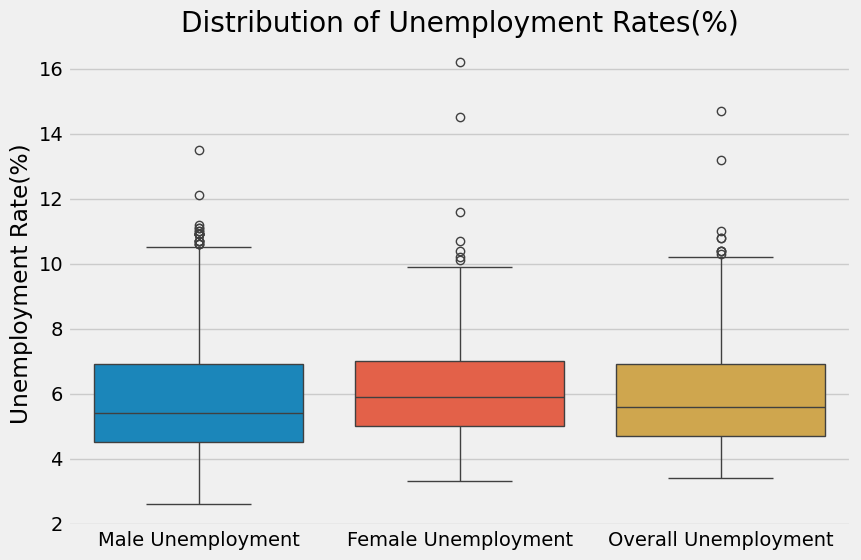

In [41]:
def q3_1():
    plt.figure(figsize=(9, 6))
    ag_test = sns.boxplot( data=unemployment_df[["Male Unemployment", "Female Unemployment", "Overall Unemployment"]])
    plt.ylabel("Unemployment Rate(%)")
    plt.title('Distribution of Unemployment Rates(%)')
    return ag_test.lines, plt.gca() # DO NOT edit this line
q3_1();

In [42]:
grader.check("q3_1")

q3_1 results: All test cases passed!

### Violin Plot

A violin plot is a combination of a histogram and boxplot. It shows you the general distribution of the data (by creating a histogram and drawing a line to capture its general shape) as well as specific statistics (same as the boxplot). 

**Question 3.2**: Use [`sns.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) on `merged_df` to create a violin plot of just the `Overall Unemployment` and `Inflation`. Label your plot properly (although there should be no need to manually label your x-axis). We have included an image of what the plot should look like.

<img src="assets/q3_2.png" width="700">

In [43]:
merged_df

,Date,Male Unemployment,Female Unemployment,Overall Unemployment,Inflation,Decade
0,1955-01-01,4.8,5.3,4.9,-0.25746,1950
1,1956-01-01,3.8,4.5,4.0,1.47411,1950
2,1957-01-01,3.9,4.8,4.2,3.39269,1950
3,1958-01-01,5.7,5.9,5.8,2.73002,1950
4,1959-01-01,5.9,6.2,6.0,0.93199,1950
...,...,...,...,...,...,...
63,2018-01-01,4.1,4.0,4.0,2.43900,2010
64,2019-01-01,4.0,3.9,4.0,1.81289,2010
65,2020-01-01,3.5,3.5,3.5,1.25128,2020
66,2021-01-01,6.4,6.3,6.3,4.68256,2020


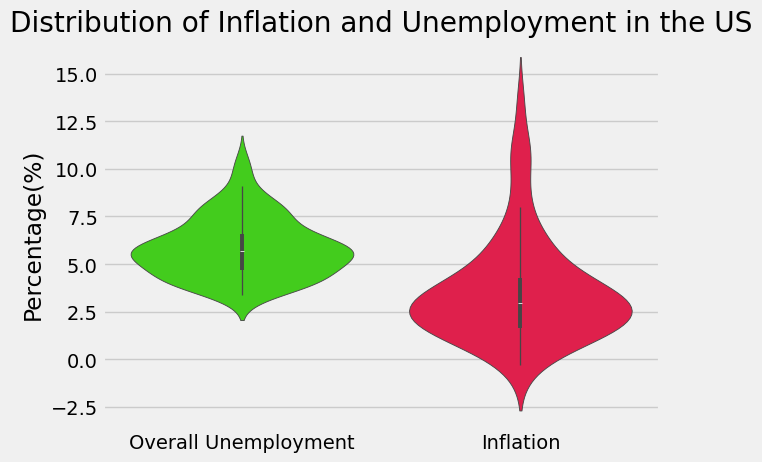

In [44]:
def q3_2():
    ag_test = sns.violinplot(merged_df[['Overall Unemployment','Inflation']], palette="prism") # DO NOT edit ag_test = sns...
    plt.ylabel("Percentage(%)")
    plt.title('Distribution of Inflation and Unemployment in the US')
    return ag_test.lines, plt.gca() # DO NOT edit this line
q3_2();

In [45]:
grader.check("q3_2")

q3_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.3**: What do you notice from the violin plot above? (Distribution, skewness, etc.) Please give the reasoning to your answer.   

The violin plot shows that overall unemployment is more symmetrically distributed, with most values around 5-6%, indicating stability. Inflation, has most values around 2.5% but is more skewed, with some high spikes up to 15%. So unemployment is more stable over time, and inflation fluctuates more.

<!-- END QUESTION -->

**Question 3.4**: For your final plot, recreate the plot from question 2.11 in seaborn, but add a kernel density estimate. Label your plot properly. We have included an image of what the plot should look like.

<img src="assets/q3_4.png" width="700">

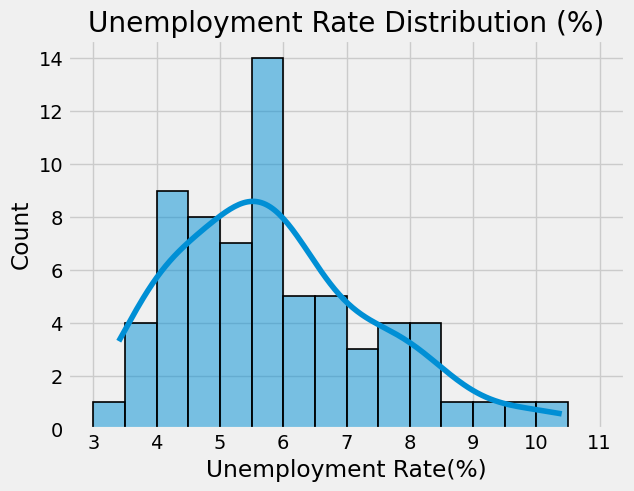

In [46]:
def q3_4():
    bins = np.arange(3, 11.5, 0.5)
    ag_test = sns.histplot(data= merged_df['Overall Unemployment'], bins=bins, kde=True, edgecolor='black', linewidth=1.2) # DO NOT edit ag_test = sns......
    plt.ylabel('Count')
    plt.xlabel('Unemployment Rate(%)')
    plt.title('Unemployment Rate Distribution (%)')
    return ag_test.get_lines(), plt.gca() # DO NOT edit this line
q3_4();

In [47]:
grader.check("q3_4")

q3_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.5**: What does a kernel density estimate try to do? How does it work?


A KDE is a way to smooth out data and show where values are more or less concentrated. It works by placing small curves or kernels on each data point, then adding them together to create a smooth line that represents the overall distribution. This helps see patterns in the data without relying on rigid bins like a histogram.

<!-- END QUESTION -->

---
## Conclusion

**Congratulations!** You have finished lab 4! We hope you enjoyed the lab!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...

